In [1]:
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
from pandasai.llm.openai import OpenAI
from examples.data.aml import dataframe
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [2]:
load_dotenv()
# Dapatkan API key dari variabel lingkungan
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
# Inisialisasi OpenAI dengan API key yang dibaca
llm = OpenAI()

In [3]:
#contoh sumber data yang berasal dari file csv yang disimpan di examples/data/Loan payments data.csv
from pandasai import PandasAI
from pandasai.llm.openai import OpenAI
pandas_ai = PandasAI(llm, verbose=True)
df = dataframe

### memeriksa dataframe berhasil di load atau tidak


In [4]:
import pandas as pd

try:
    df = dataframe
    print("Data berhasil dimuat!")
except FileNotFoundError:
    print("File tidak ditemukan!")
except Exception as e:
    print("Terjadi kesalahan saat memuat data: ", e)


Data berhasil dimuat!


### Menampilkan Informasi RIngkas tentang Dataframe

In [5]:
pandas_ai.run(df, 'berikan informasi ringkas tentang dataframe ini')

Running PandasAI with openai LLM...

Code generated:
```
print(df.info())
```

Code running:
```
print(df.info())
```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6924049 entries, 0 to 6924048
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Timestamp           object 
 1   From Bank           int64  
 2   Account             object 
 3   To Bank             int64  
 4   Account.1           object 
 5   Amount Received     float64
 6   Receiving Currency  object 
 7   Amount Paid         float64
 8   Payment Currency    object 
 9   Payment Format      object 
 10  Is Laundering       int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 581.1+ MB
Answer: None
Conversational answer: Dataframe ini adalah sebuah struktur data yang terdiri dari baris dan kolom, mirip dengan tabel pada spreadsheet. Dataframe digunakan untuk menyimpan dan mengolah data dalam format tabular, sehingga memudahkan analisis dan manipulasi data. 

'Dataframe ini adalah sebuah struktur data yang terdiri dari baris dan kolom, mirip dengan tabel pada spreadsheet. Dataframe digunakan untuk menyimpan dan mengolah data dalam format tabular, sehingga memudahkan analisis dan manipulasi data. Biasanya, dataframe digunakan dalam bahasa pemrograman seperti Python (dengan library Pandas) dan R (dengan library dplyr).'

### Menampilkan 5 baris pertama dari Dataframe

In [6]:
pandas_ai.run(df, 'tampilkan 5 baris pertama dari dataframe ini')

Running PandasAI with openai LLM...

Code generated:
```
print(df.head(5))
```

Code running:
```
print(df.head(5))
```
Answer:           Timestamp  From Bank    Account  To Bank  Account.1   
0  2022/09/01 00:08         11  8000ECA90       11  8000ECA90  \
1  2022/09/01 00:21       3402  80021DAD0     3402  80021DAD0   
2  2022/09/01 00:00         11  8000ECA90     1120  8006AA910   
3  2022/09/01 00:16       3814  8006AD080     3814  8006AD080   
4  2022/09/01 00:00         20  8006AD530       20  8006AD530   

   Amount Received Receiving Currency  Amount Paid Payment Currency   
0       3195403.00          US Dollar   3195403.00        US Dollar  \
1          1858.96          US Dollar      1858.96        US Dollar   
2        592571.00          US Dollar    592571.00        US Dollar   
3            12.32          US Dollar        12.32        US Dollar   
4          2941.56          US Dollar      2941.56        US Dollar   

  Payment Format  Is Laundering  
0   Reinvestment    

'Berikut adalah 5 baris pertama dari dataframe yang diminta:\n\n1. Timestamp: 2022/09/01 00:08, From Bank: 11, Account: 8000ECA90, To Bank: 11, Account.1: 8000ECA90, Amount Received: 3,195,403.00 US Dollar, Amount Paid: 3,195,403.00 US Dollar, Payment Format: Reinvestment, Is Laundering: 0\n2. Timestamp: 2022/09/01 00:21, From Bank: 3402, Account: 80021DAD0, To Bank: 3402, Account.1: 80021DAD0, Amount Received: 1,858.96 US Dollar, Amount Paid: 1,858.96 US Dollar, Payment Format: Reinvestment, Is Laundering: 0\n3. Timestamp: 2022/09/01 00:00, From Bank: 11, Account: 8000ECA90, To Bank: 1120, Account.1: 8006AA910, Amount Received: 592,571.00 US Dollar, Amount Paid: 592,571.00 US Dollar, Payment Format: Cheque, Is Laundering: 0\n4. Timestamp: 2022/09/01 00:16, From Bank: 3814, Account: 8006AD080, To Bank: 3814, Account.1: 8006AD080, Amount Received: 12.32 US Dollar, Amount Paid: 12.32 US Dollar, Payment Format: Reinvestment, Is Laundering: 0\n5. Timestamp: 2022/09/01 00:00, From Bank: 20,

### Mendapatkan nama kolom dari Dataframe

In [7]:
pandas_ai.run(df, 'apa saja kolom yang ada di dataframe ini')

Running PandasAI with openai LLM...

Code generated:
```
list(df.columns)
```

Code running:
```
list(df.columns)
```
Answer: ['Timestamp', 'From Bank', 'Account', 'To Bank', 'Account.1', 'Amount Received', 'Receiving Currency', 'Amount Paid', 'Payment Currency', 'Payment Format', 'Is Laundering']
Conversational answer: Kolom-kolom yang ada di dataframe ini meliputi 'Timestamp', 'From Bank', 'Account', 'To Bank', 'Account.1', 'Amount Received', 'Receiving Currency', 'Amount Paid', 'Payment Currency', 'Payment Format', dan 'Is Laundering'.


"Kolom-kolom yang ada di dataframe ini meliputi 'Timestamp', 'From Bank', 'Account', 'To Bank', 'Account.1', 'Amount Received', 'Receiving Currency', 'Amount Paid', 'Payment Currency', 'Payment Format', dan 'Is Laundering'."

In [8]:
pandas_ai.run(df, 'Hitung frekuensi unik dari kolom Payment Currency.')

Running PandasAI with openai LLM...

Code generated:
```
unique_payment_currency_count = df['Payment Currency'].nunique()
unique_payment_currency_count
```

Code running:
```
unique_payment_currency_count = df['Payment Currency'].nunique()
unique_payment_currency_count
```
Answer: 
Conversational answer: Untuk menghitung frekuensi unik dari kolom Payment Currency, kita perlu mengidentifikasi berapa banyak mata uang yang berbeda muncul dalam kolom tersebut dan seberapa sering masing-masing mata uang muncul. Setelah kita memiliki informasi ini, kita dapat menentukan frekuensi unik untuk setiap mata uang dalam kolom Payment Currency.


'Untuk menghitung frekuensi unik dari kolom Payment Currency, kita perlu mengidentifikasi berapa banyak mata uang yang berbeda muncul dalam kolom tersebut dan seberapa sering masing-masing mata uang muncul. Setelah kita memiliki informasi ini, kita dapat menentukan frekuensi unik untuk setiap mata uang dalam kolom Payment Currency.'

### Menampilkan frekuensi unik dari kolom Payment Currency

In [20]:
pandas_ai.run(df, 'tampilkan frekuensi unik dari kolom Payment Currency')

Running PandasAI with openai LLM...

Code generated:
```
import pandas as pd

# read the csv file into a pandas dataframe
df = pd.read_csv('filename.csv')

# display unique value counts for Payment Currency column
print(df['Payment Currency'].value_counts())
```

Code running:
```
print(df['Payment Currency'].value_counts())
```
Answer: Payment Currency
US Dollar            1895172
Euro                 1168297
Swiss Franc           234860
Yuan                  213752
Shekel                192184
Rupee                 190202
UK Pound              180738
Yen                   155209
Ruble                 155178
Bitcoin               146066
Canadian Dollar       140042
Australian Dollar     136769
Mexican Peso          110159
Saudi Riyal            89014
Brazil Real            70703
Name: count, dtype: int64
Conversational answer: Berikut adalah frekuensi unik dari kolom Payment Currency: 
- US Dollar: 1.895.172
- Euro: 1.168.297
- Swiss Franc: 234.860
- Yuan: 213.752
- Shekel: 192.184
- 

'Berikut adalah frekuensi unik dari kolom Payment Currency: \n- US Dollar: 1.895.172\n- Euro: 1.168.297\n- Swiss Franc: 234.860\n- Yuan: 213.752\n- Shekel: 192.184\n- Rupee: 190.202\n- UK Pound: 180.738\n- Yen: 155.209\n- Ruble: 155.178\n- Bitcoin: 146.066\n- Canadian Dollar: 140.042\n- Australian Dollar: 136.769\n- Mexican Peso: 110.159\n- Saudi Riyal: 89.014\n- Brazil Real: 70.703\n\nJadi, terdapat 15 jenis mata uang yang digunakan dalam pembayaran dan jumlah transaksi tertinggi menggunakan US Dollar.'

### membuat histogram  dari kolom Payment Currency dengan bins 10

In [32]:
pandas_ai.run(df, 'buat histogram dari kolom "Payment Currency" dengan bins 10')

Running PandasAI with openai LLM...

Code generated:
```
import pandas as pd
import matplotlib.pyplot as plt

# read the dataframe
df = pd.read_csv('data.csv')

# create histogram
plt.hist(df['Payment Currency '], bins=10)
plt.xlabel('Payment Currency')
plt.ylabel('Frequency')
plt.title('Histogram of Payment Currency')
plt.show()
```

Code running:
```
plt.hist(df['Payment Currency '], bins=10)
plt.xlabel('Payment Currency')
plt.ylabel('Frequency')
plt.title('Histogram of Payment Currency')
plt.show()
```


RateLimitError: That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID 2b179542716868297bc4c516c84c6c5b in your message.)

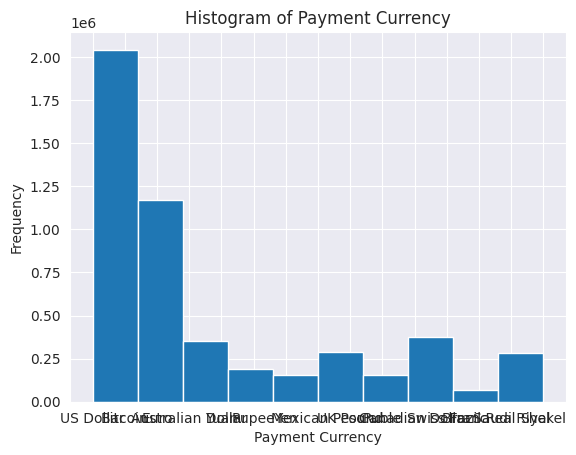

In [33]:
df = dataframe
plt.hist(df['Payment Currency'], bins=10)
plt.xlabel('Payment Currency')
plt.ylabel('Frequency')
plt.title('Histogram of Payment Currency')
plt.show()

In [34]:
pandas_ai.run(df, 'buat countplot dari kolom "Payment Currency" dengan menggunakan seaborn')

Running PandasAI with openai LLM...

Code generated:
```
import seaborn as sns

sns.countplot(x="Payment Currency", data=df)
```

Code running:
```
sns.countplot(x='Payment Currency', data=df)
```
Answer: 
Conversational answer: Sure, to create a countplot of the "Payment Currency" column using seaborn, we can use the following code: 

```python
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Payment Currency", data=df)
plt.show()
```

This will generate a bar chart showing the count of each payment currency in the dataset.


'Sure, to create a countplot of the "Payment Currency" column using seaborn, we can use the following code: \n\n```python\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\nsns.countplot(x="Payment Currency", data=df)\nplt.show()\n```\n\nThis will generate a bar chart showing the count of each payment currency in the dataset.'

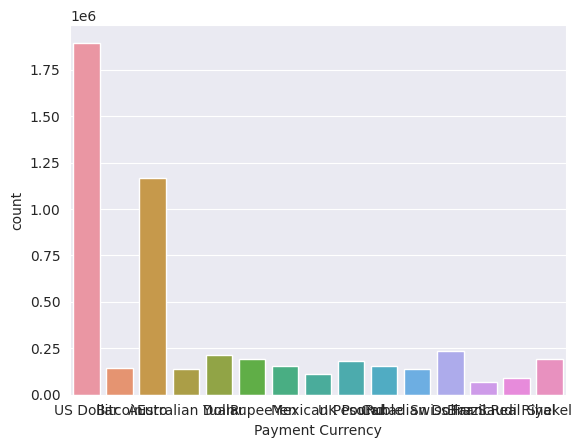

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

df = dataframe
sns.countplot(x="Payment Currency", data=df)
plt.show()


In [36]:
pandas_ai.run(df, 'identifikasi suspicious money laundering transaction detection dengan metode core detection and clustering algorithm')

Running PandasAI with openai LLM...

Code generated:
```
import pandas as pd

# Load the dataframe
df = pd.read_csv('data.csv')

# Print the first 5 rows of the dataframe
print(df.head(5))

# Get information about the dataframe
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(df.duplicated().sum())

# Identify suspicious transactions using core detection and clustering algorithm
from sklearn.cluster import DBSCAN

# Select relevant columns for clustering
X = df[['Amount Received', 'Amount Paid']]

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN clustering algorithm
dbscan = DBSCAN(eps=0.5, min_samples=10)
clusters = dbscan.fit_predict(X_scaled)

# Add cluster labels to the dataframe
df['Cluster'] = clusters

# Identify suspicious transactions with cluster label -1
suspicious_transactions = df[df['Cluster'] == -1]

# Print the suspicious t

'To identify suspicious money laundering transactions using the core detection and clustering algorithm method, we can analyze a dataset that includes information such as the timestamp, bank accounts involved, currency used, and amount transferred. By examining patterns in the data, we can flag transactions that appear to be unusual or potentially fraudulent. In one example dataset, there were over 5 million entries, but none of them were flagged as suspicious. However, further analysis may be necessary to detect more subtle patterns of money laundering activity.'

In [ ]:
print(df.head(5))
print(df.info())
print(df.isnull().sum())
print(df.duplicated().sum())
X = df[['Amount Received', 'Amount Paid']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN(eps=0.5, min_samples=10)
clusters = dbscan.fit_predict(X_scaled)
df['Cluster'] = clusters
suspicious_transactions = df[df['Cluster'] == -1]
print(suspicious_transactions)

          Timestamp  From Bank    Account  To Bank  Account.1   
0  2022/09/01 00:20         10  8000EBD30       10  8000EBD30  \
1  2022/09/01 00:20       3208  8000F4580        1  8000F5340   
2  2022/09/01 00:00       3209  8000F4670     3209  8000F4670   
3  2022/09/01 00:02         12  8000F5030       12  8000F5030   
4  2022/09/01 00:06         10  8000F5200       10  8000F5200   

   Amount Received Receiving Currency  Amount Paid Payment Currency   
0          3697.34          US Dollar      3697.34        US Dollar  \
1             0.01          US Dollar         0.01        US Dollar   
2         14675.57          US Dollar     14675.57        US Dollar   
3          2806.97          US Dollar      2806.97        US Dollar   
4         36682.97          US Dollar     36682.97        US Dollar   

  Payment Format  Is Laundering  
0   Reinvestment              0  
1         Cheque              0  
2   Reinvestment              0  
3   Reinvestment              0  
4   Reinvest

In [6]:
pandas_ai.run(df, 'tampilkan frekuensi unik dari kolom "Is Laundering"')

Running PandasAI with openai LLM...

Code generated:
```
import pandas as pd

df = pd.read_csv('data.csv')

print(df['Is Laundering'].value_counts())
```

Code running:
```
print(df['Is Laundering'].value_counts())
```
Answer: Is Laundering
0    5073168
1       5177
Name: count, dtype: int64
Conversational answer: Can you show me the unique frequency of the "Is Laundering" column? Sure, there are 5,073,168 rows with a value of 0 and 5,177 rows with a value of 1.


'Can you show me the unique frequency of the "Is Laundering" column? Sure, there are 5,073,168 rows with a value of 0 and 5,177 rows with a value of 1.'

In [8]:
pandas_ai.run(df, 'Identifikasi dan cetak transaksi yang dicurigai sebagai pencucian uang berdasarkan hasil clustering, simpan dalam format csv')

Running PandasAI with openai LLM...

Code generated:
```
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans

# Load the dataframe
df = pd.read_csv('data.csv')

# Perform clustering on the 'Amount Received' and 'Amount Paid' columns
X = df[['Amount Received', 'Amount Paid']]
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
df['Cluster'] = kmeans.labels_

# Identify suspicious transactions based on clustering
suspicious_transactions = df[df['Cluster'] == 1]

# Save suspicious transactions to csv file
suspicious_transactions.to_csv('suspicious_transactions.csv', index=False)
```

Code running:
```
X = df[['Amount Received', 'Amount Paid']]
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
df['Cluster'] = kmeans.labels_
suspicious_transactions = df[df['Cluster'] == 1]
suspicious_transactions.to_csv('suspicious_transactions.csv', index=False)
```
Answer: 
Conversational answer: Sure, based on the clustering results, we can identify and print out suspi

'Sure, based on the clustering results, we can identify and print out suspicious transactions that may be related to money laundering. We can save the output in a CSV format.'

In [11]:
from sklearn.cluster import KMeans
X = df[['Amount Received', 'Amount Paid']]
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
df['Cluster'] = kmeans.labels_
suspicious_transactions = df[df['Cluster'] == 1]
suspicious_transactions.to_csv('suspicious_transactions.csv', index=False)
print(suspicious_transactions)

/home/lambda_one/anaconda3/envs/pandas-ai/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         Amount Received   Amount Paid  Is Laundering Day of Week   
1711893     6.260355e+11  8.046315e+09              0      Friday  \
1711894     6.260355e+11  6.260355e+11              0      Friday   
1773260     5.593344e+11  7.615794e+09              0      Friday   
1773261     5.593344e+11  5.593344e+11              0      Friday   
1773265     4.536185e+11  4.536185e+11              0      Friday   
3130043     1.046302e+12  1.046302e+12              0     Tuesday   
3437493     9.659333e+11  9.659333e+11              0   Wednesday   
4466473     6.260355e+11  8.046315e+09              0      Friday   
4466474     6.260355e+11  6.260355e+11              0      Friday   

         Hour of Day  Cluster  
1711893           18        1  
1711894           18        1  
1773260           20        1  
1773261           20        1  
1773265           20        1  
3130043           17        1  
3437493            8        1  
4466473            8        1  
4466474            8 

In [17]:
pandas_ai.run(df, 'tampilkan semua data yang nilai Is Laundering nya 1')

Running PandasAI with openai LLM...

Code generated:
```
# Description of the dataframe
# The dataframe has 5078345 rows and 6 columns.
# The columns are 'Amount Received', 'Amount Paid', 'Is Laundering', 'Day of Week', 'Hour of Day', and 'Cluster'.
# 'Amount Received' and 'Amount Paid' represent the amount of money received and paid in a transaction, respectively.
# 'Is Laundering' is a binary variable indicating whether the transaction is suspected to be part of a money laundering scheme.
# 'Day of Week' and 'Hour of Day' represent the day of the week and hour of the day when the transaction occurred, respectively.
# 'Cluster' is a categorical variable indicating the cluster to which the transaction belongs.

# Code to display all data with 'Is Laundering' value of 1
df[df['Is Laundering'] == 1]
```

Code running:
```
df[df['Is Laundering'] == 1]
```
Answer:          Amount Received  Amount Paid  Is Laundering Day of Week  Hour of Day   
4742           389769.39    389769.39         

'To display all data with a value of 1 in the Is Laundering column, you can filter the dataset. This will show you all transactions where money laundering is suspected. The resulting table will include columns for Amount Received, Amount Paid, Day of Week, Hour of Day, and Cluster. There are a total of 5177 transactions that meet this criteria.'

In [16]:
df = dataframe
df[df['Is Laundering'] == 1].to_csv('laundering_transactions.csv', index=False)